In [6]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import minimize

[[-0.51503939  0.59189672]
 [ 0.0478734  -0.48840469]
 [-0.35495284 -0.39181335]
 [ 1.86426106 -1.37148975]
 [ 2.22627536 -0.11810965]
 [ 0.11984837  0.18259889]
 [-0.65773926 -1.64623164]
 [-1.14158407 -1.43908939]
 [ 0.74499231 -1.73922014]
 [-0.33219719 -0.73841346]
 [ 2.76621424  3.24691448]
 [ 5.82252138  2.0308695 ]
 [ 1.73381416  5.01766574]
 [ 4.10880587  2.9161463 ]
 [ 1.80119809  5.93170517]
 [ 3.88251299  1.21776835]
 [ 3.4819637   4.93600617]
 [ 3.00786723  3.0115029 ]
 [ 2.48139631  3.26794196]
 [ 2.65161228  2.98947907]]


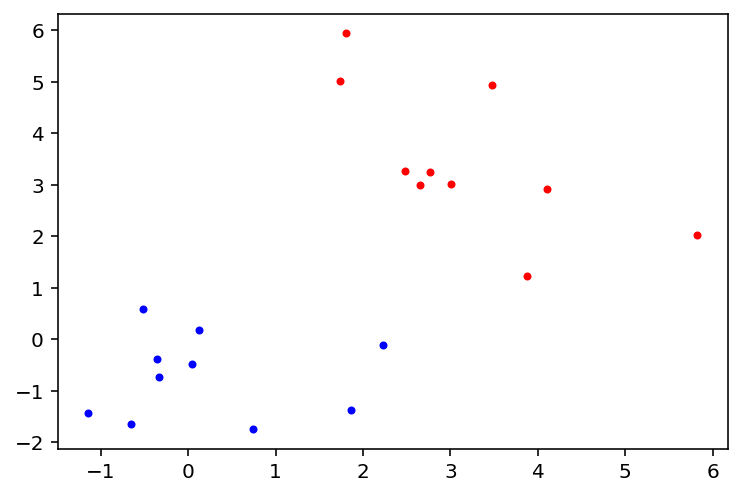

In [7]:
np.random.seed(9999)
xp = np.random.randn(10, 2)
xm = np.random.randn(10, 2) + [3, 3]
plt.plot(xp[:, 0], xp[:,1], '.b')
plt.plot(xm[:, 0], xm[:,1], '.r')
data = np.concatenate([xp, xm], axis=0)
classes = np.array([1]*10+[-1]*10)
print(data)

1) What is an equation of line/plane? 

2) Explain geometrical interpretation of the two parameters

3) How do you determine whether a point $\vec{x}$ is one side of the line or another?

4) Given a line, is $\vec{w}$ and $b$ unique. (Are there two equation that represents the same line?)

5) Give another equation for the line represent by $\vec{w}=[1,2]$, $b=3$.

6) If we want $b$ in the previous equation to be 1. What should $\vec{w}$ be

7) Draw a line defined by $\vec{w}=[2,3]$, $b=1$.

8) Draw a green point on the side where $\vec{w}\cdot\vec{x} + b > 0$ and a blue point on the other side.

9) What is a linearly separable data?

10) What is a margin?

11) How do we calculate the margin? And with that formula what kind of normalization are we using?

12) What are we trying to optimize? What are our contraint?

13) Can we use gradient descent with constrained optimization? Why?

14) Given these data points find the line of maximum margin. Draw it along with data points.

Use numpy.optimize.minimize with method = SLSQP

Read the doc here.
http://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html#constrained-minimization-of-multivariate-scalar-functions-minimize

In [8]:
#Example

def f(x):
    a, b = x
    return (a-1)**2 + (b-2)**2

# minimize f(x)
# subject to: x -----> (a, b)
# a - 5 >= 0
# b - 4 >= 0

#return list of things that should be greater than 0
def constraints(x):
    a, b = x
    return [a-5, b-4]

cons = ({'type': 'ineq',
         'fun' : constraints})

minimize(f, [10., 10.], method="SLSQP", constraints=cons)

     fun: 19.999999999988923
     jac: array([8., 4.])
 message: 'Optimization terminated successfully.'
    nfev: 8
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([5., 4.])

15) What is a slack variable?

16) How do we penalize the slack variable.

17) Plot soft margin cost function along with logistic cost.

In [31]:

class SoftMarginSVM:
    
    def __init__(self, C: float):
        self.C = C
        self.w = None
        self.b: float = None
            
    def train(self, xs, ys):
        def cost(v):
            b = v[0]
            w = v[1:]
            xi = 1-ys*(xs@w + b)
            accuracy = np.sum(np.maximum(0, xi))
            margin = sum(w**2)
            return margin + self.C * accuracy
        
        n_features = xs.shape[1]
        initial_guess = np.random.randn(n_features+1)
        v = minimize(cost, initial_guess)
        self.w = v.x[1:]
        self.b = v.x[0]
        return v
    


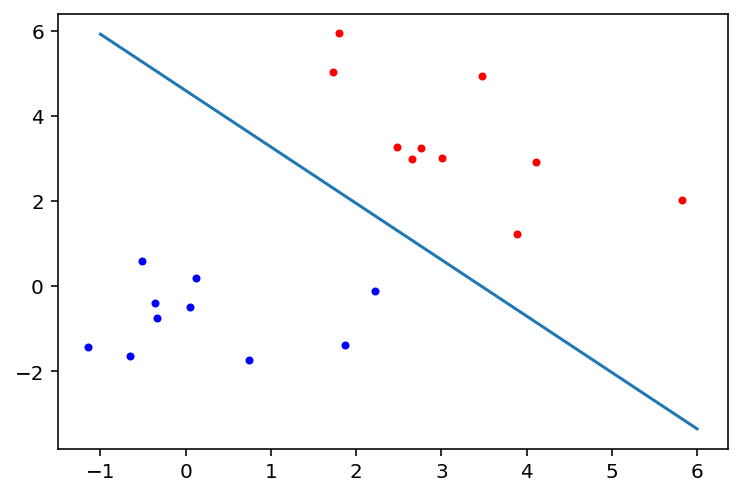

In [43]:
s = SoftMarginSVM(C=1.)
s.train(data, classes)
w1, w2 = s.w
b = s.b
# x2 = -w1/w2 x1 - b/w2
xs = np.linspace(-1,6)
ys = -w1/w2*xs - b/w2

plt.plot(xs ,ys)
plt.plot(xp[:, 0], xp[:,1], '.b')
plt.plot(xm[:, 0], xm[:,1], '.r')



18) How can we view our new and penalized cost function as a regularization?

In [9]:
np.maximum([0,1],[1,2])

array([1, 2])

19) Try your new cost function with these data points.

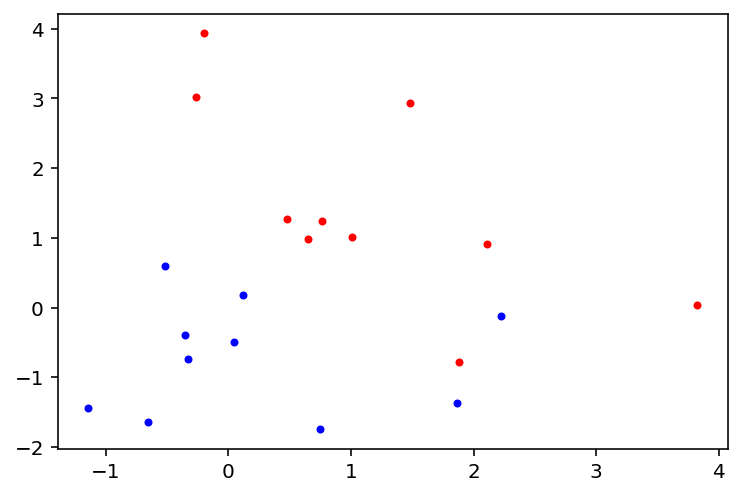

In [44]:
np.random.seed(9999)
xp = np.random.randn(10, 2)
xm = np.random.randn(10, 2) + [1, 1]
plt.plot(xp[:, 0], xp[:,1], '.b')
plt.plot(xm[:, 0], xm[:,1], '.r')
data = np.concatenate([xp, xm], axis=0)
classes = np.array([1]*10+[-1]*10)

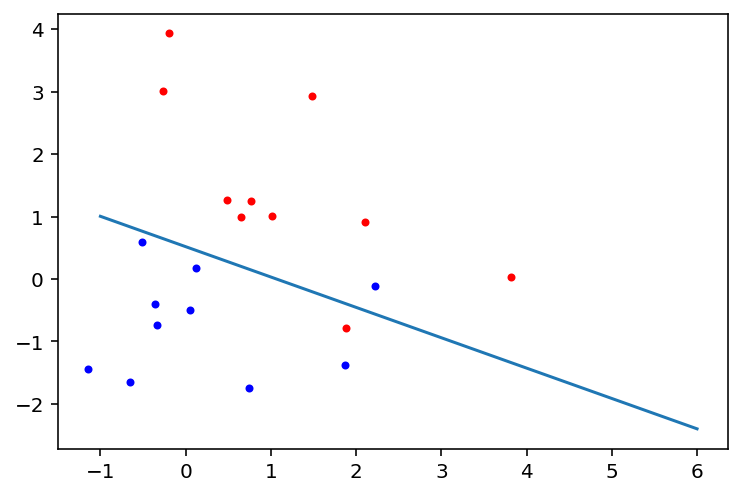

In [47]:
s = SoftMarginSVM(C=1.)
s.train(data, classes)
w1, w2 = s.w
b = s.b
# x2 = -w1/w2 x1 - b/w2
xs = np.linspace(-1,6)
ys = -w1/w2*xs - b/w2

plt.plot(xs ,ys)
plt.plot(xp[:, 0], xp[:,1], '.b')
plt.plot(xm[:, 0], xm[:,1], '.r')



20) What if we want a curved line? Draw contour plot.

[-1 -1 -1  1  1 -1  1  1  1 -1 -1  1  1 -1  1  1  1 -1 -1 -1]


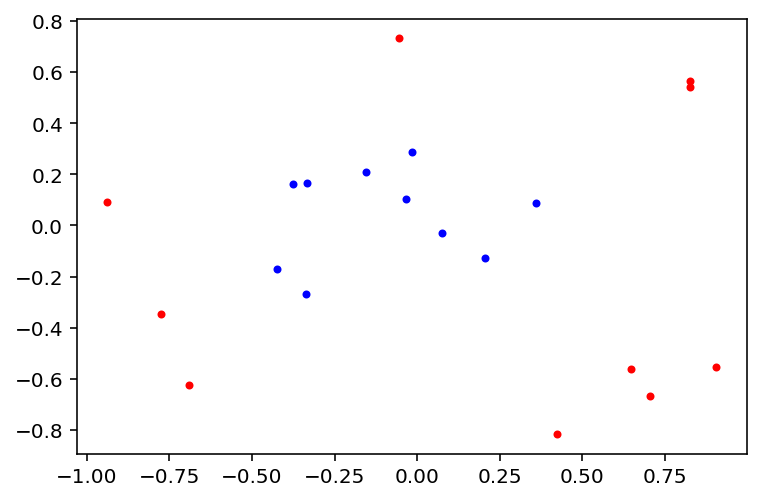

In [5]:
np.random.seed(9999)
data = np.random.random((20,2))*2-1
def is_pos(x):
    return 1 if np.linalg.norm(x-[0.1,0.1])<0.6 else -1
classes = np.array([is_pos(x) for x in data])
print(classes)
plt.plot(data[classes==1,0], data[classes==1,1], '.b')
plt.plot(data[classes==-1,0], data[classes==-1,1], '.r')




21) What are the support vectors?